In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [11]:
# info() gives you structural information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [114]:
# univariable describe
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [113]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [115]:
print(df.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [116]:
# 计算取消订阅和未取消订阅的用户数量
churn_counts = df['Churned'].value_counts()

# 打印结果
print(churn_counts)


Churned
0    754
1    246
Name: count, dtype: int64


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/260071467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


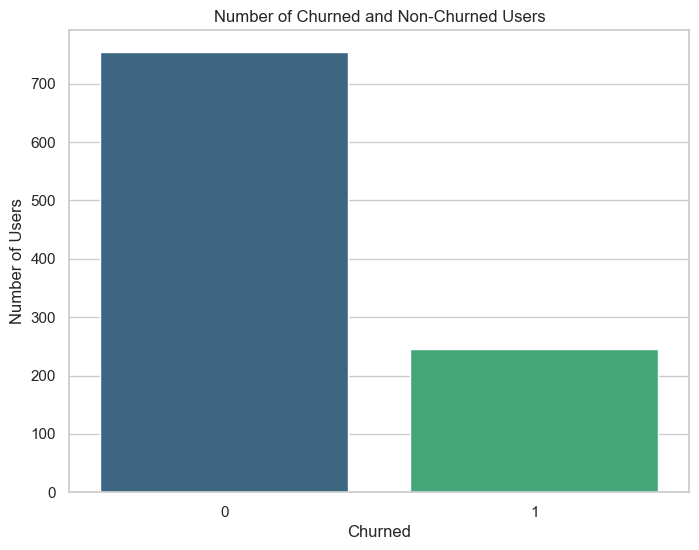

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid")

# 创建条形图
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
plt.title('Number of Churned and Non-Churned Users')
plt.xlabel('Churned')
plt.ylabel('Number of Users')
plt.show()


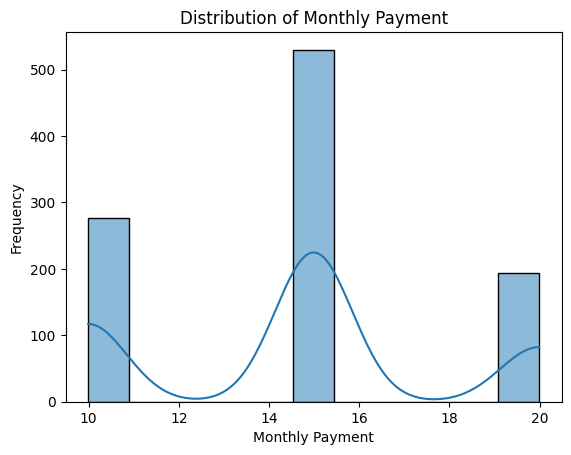

In [16]:
sns.histplot(df['Monthly_Payment'], kde=True)
plt.title('Distribution of Monthly Payment')
plt.xlabel('Monthly Payment')
plt.ylabel('Frequency')
plt.show()

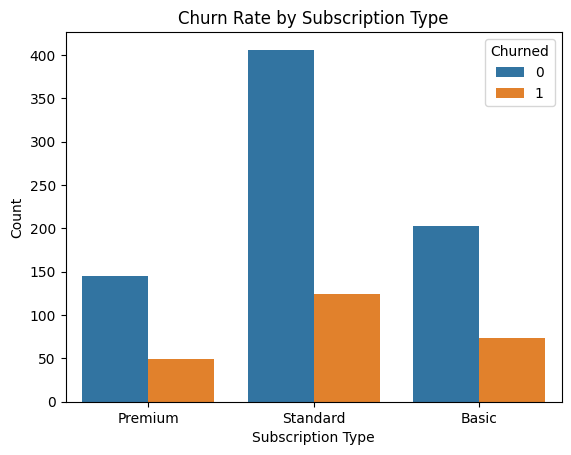

In [17]:
sns.countplot(x='Subscription_Type', hue='Churned', data=df)
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

In [18]:
# Calculate key metrics
total_revenue = df['Monthly_Payment'].sum() * len(df['Subscription_Start_Date'].unique())
average_monthly_payment = df['Monthly_Payment'].mean()
churn_rate = df['Churned'].mean() * 100
average_session_length = df['Average_Session_Length'].mean()
average_rating_given = df['Rating_Given'].mean()

# Display calculated metrics
print(f"Total Revenue: ${total_revenue}")
print(f"Average Monthly Payment: ${average_monthly_payment:.2f}")
print(f"Churn Rate: {churn_rate:.2f}%")
print(f"Average Session Length: {average_session_length:.2f} minutes")
print(f"Average Rating Given: {average_rating_given:.2f}")


Total Revenue: $14580000.000000002
Average Monthly Payment: $14.58
Churn Rate: 24.60%
Average Session Length: 1.89 minutes
Average Rating Given: 3.03


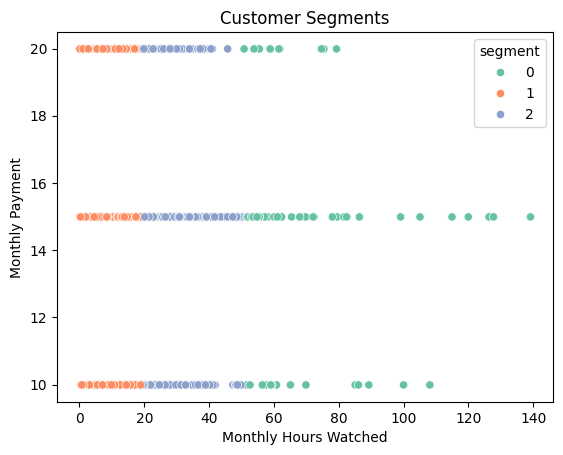

In [20]:
from sklearn.cluster import KMeans

# Select features for customer segmentation
features = df[['Monthly_Payment', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Rating_Given']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(features)

# Visualize customer segments
sns.scatterplot(x='Monthly_Hours_Watched', y='Monthly_Payment', hue='segment', data=df, palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Monthly Hours Watched')
plt.ylabel('Monthly Payment')
plt.show()


<Axes: ylabel='Monthly_Hours_Watched'>

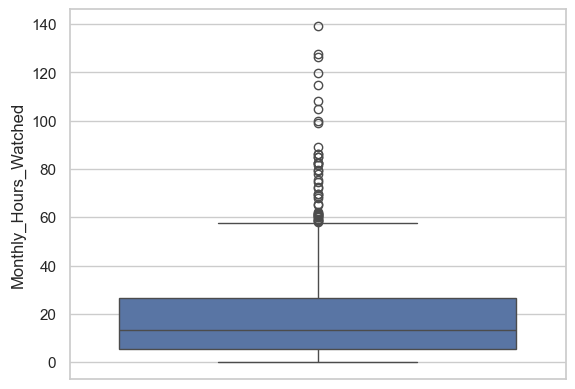

In [119]:
#botplot
sns.boxplot(df['Monthly_Hours_Watched'])

In [121]:
df[df['Monthly_Hours_Watched'] > 58].describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,567.711111,42.044444,14.434444,79.649662,1.682700,1052.000000,2.866667,0.155556
std,277.304446,13.013901,3.237252,21.163830,1.567740,28.126338,1.455397,0.366529
min,4.000000,18.000000,9.990000,58.144046,0.000486,1003.000000,1.000000,0.000000
25%,359.000000,32.000000,9.990000,61.558471,0.642879,1025.000000,1.000000,0.000000
50%,600.000000,42.000000,14.990000,74.665845,1.207570,1051.000000,3.000000,0.000000
75%,807.000000,52.000000,14.990000,86.082656,2.493770,1076.000000,4.000000,0.000000
max,989.000000,68.000000,19.990000,139.170408,6.687205,1098.000000,5.000000,1.000000


<Axes: ylabel='Average_Session_Length'>

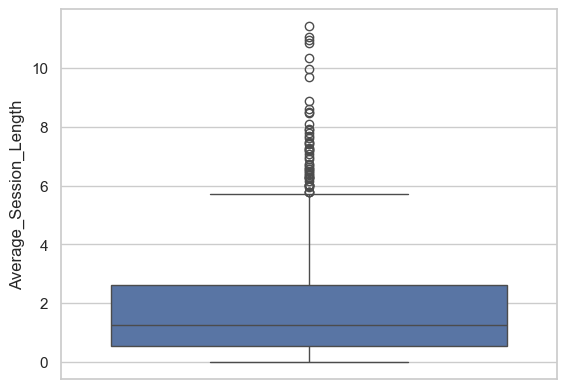

In [120]:
sns.boxplot(df['Average_Session_Length'])

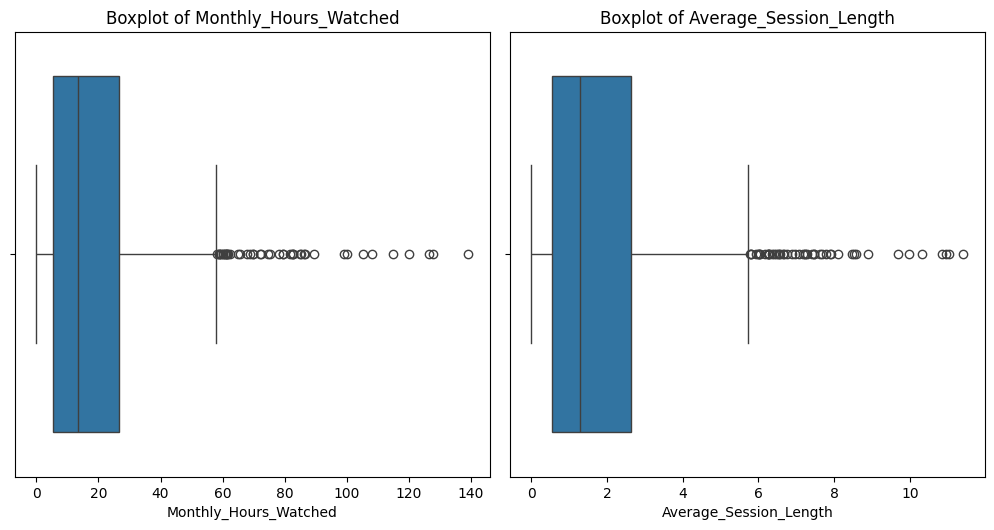

In [56]:
import matplotlib.pyplot as plt

# Plot boxplots for each numeric variable
numeric_columns = ['Monthly_Hours_Watched', 'Average_Session_Length']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [57]:
from scipy import stats

# Calculate z-scores
z_scores = df[numeric_columns].apply(stats.zscore)

# Identify outliers (z-score > 3 or < -3)
outliers_z = (z_scores.abs() > 3).sum()
print("Number of outliers detected using z-scores:")
print(outliers_z)


Number of outliers detected using z-scores:
Monthly_Hours_Watched     21
Average_Session_Length    17
dtype: int64


In [112]:
df[df['Monthly_Hours_Watched'] > 100].describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,553.250000,46.125000,13.74000,117.684392,1.693590,1043.875000,2.750000,0.25000
std,229.133617,11.655011,2.31455,13.171823,1.561573,23.996652,1.488048,0.46291
min,274.000000,30.000000,9.99000,100.009333,0.101113,1011.000000,1.000000,0.00000
25%,351.000000,36.000000,13.74000,107.363232,0.567157,1021.750000,1.750000,0.00000
50%,559.000000,46.500000,14.99000,117.462210,1.468836,1047.000000,2.500000,0.00000
75%,750.000000,53.750000,14.99000,126.739868,2.018974,1065.500000,4.000000,0.25000
max,810.000000,63.000000,14.99000,139.170408,4.781468,1071.000000,5.000000,1.00000


In [21]:
# add number of watching per month
df['num_wathching'] = df['Monthly_Hours_Watched'] / df['Average_Session_Length']

<Axes: ylabel='num_wathching'>

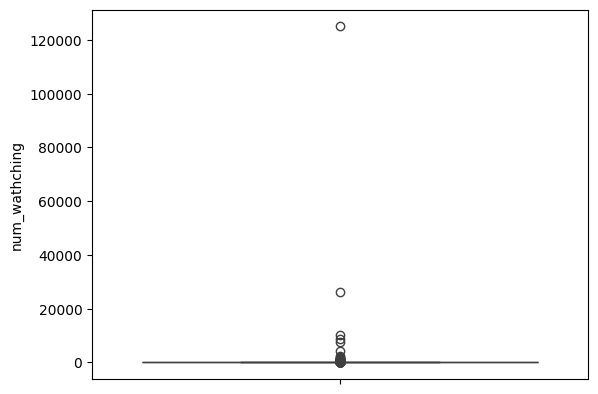

In [22]:
sns.boxplot(df['num_wathching'])

In [23]:
df['num_wathching'].describe()

count      1000.000000
mean        230.618123
std        4071.770895
min           0.006491
25%           3.447151
50%           9.923136
75%          30.822053
max      125103.212681
Name: num_wathching, dtype: float64

In [24]:
df[df['num_wathching'] < 1].describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,num_wathching
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,529.726190,43.154762,14.811429,1.588846,3.621865,1051.547619,2.785714,0.297619,0.462134
std,287.162745,16.022194,3.509576,1.465407,2.078330,29.327977,1.344972,0.459957,0.292362
min,54.000000,18.000000,9.990000,0.041574,0.057493,1001.000000,1.000000,0.000000,0.006491
25%,287.250000,29.000000,9.990000,0.401594,2.014891,1030.750000,2.000000,0.000000,0.177975
50%,533.500000,41.000000,14.990000,1.240211,3.220834,1049.500000,3.000000,0.000000,0.498231
75%,774.500000,57.250000,14.990000,2.292300,4.896439,1077.500000,4.000000,1.000000,0.670928
max,996.000000,68.000000,19.990000,7.175344,8.517275,1099.000000,5.000000,1.000000,0.946871


In [25]:
df[df['num_wathching'] < 1]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,num_wathching
53,54,67,Other,Central,2022-06-03 01:53:37.657602,Premium,19.99,Credit Card,1.500441,Documentary,TV,1.797809,1065,3,0,NaN,NaN,0.834594
69,70,67,Male,South,2023-11-06 01:53:37.657772,Standard,14.99,Credit Card,2.364135,Drama,TV,3.675000,1042,3,0,NaN,NaN,0.643302
79,80,61,Other,Central,2024-01-01 01:53:37.657878,Standard,14.99,Credit Card,7.175344,Documentary,Mobile,8.470545,1021,4,0,NaN,NaN,0.847094
81,82,27,Other,East,2020-01-08 01:53:37.657899,Standard,14.99,Credit Card,4.494491,Drama,Mobile,5.342459,1038,1,0,NaN,NaN,0.841278
83,84,31,Other,East,2021-01-31 01:53:37.657920,Standard,14.99,Direct Debit,2.441236,Comedy,Tablet,2.758549,1096,3,0,NaN,NaN,0.884971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,949,33,Other,North,2022-12-04 01:53:37.667375,Basic,9.99,Credit Card,0.945952,Documentary,Tablet,1.439299,1059,3,0,NaN,NaN,0.657231
952,953,21,Other,South,2023-01-15 01:53:37.667413,Standard,14.99,Direct Debit,0.141357,Action,PC,1.031308,1088,3,0,NaN,NaN,0.137065
954,955,20,Female,East,2022-12-29 01:53:37.667430,Standard,14.99,Credit Card,1.598094,Drama,Mobile,2.696557,1059,1,1,2023-07-18 01:53:37.667430,Found better service,0.592643
976,977,63,Female,Central,2019-07-21 01:53:37.667668,Basic,9.99,Credit Card,2.963832,Drama,Mobile,6.355837,1010,5,0,NaN,NaN,0.466317


   User_ID  Age  Gender Location     Subscription_Start_Date  \
0        1   56   Other  Central  2020-06-07 01:53:37.656934   
1        2   69   Other     West  2024-02-21 01:53:37.656980   
2        3   46  Female    North  2022-10-06 01:53:37.656995   
3        4   32  Female     East  2022-01-04 01:53:37.657006   
4        5   60  Female    North  2020-03-13 01:53:37.657017   

  Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
0           Premium            19.99    Credit Card              31.513153   
1          Standard            14.99    Credit Card               4.982277   
2          Standard            14.99         PayPal               4.114953   
3          Standard            14.99    Credit Card              60.244820   
4          Standard            14.99    Credit Card               4.711855   

  Favorite_Genre Devices_Used  Average_Session_Length  Content_ID  \
0         Action           PC                1.195762        1023   
1       

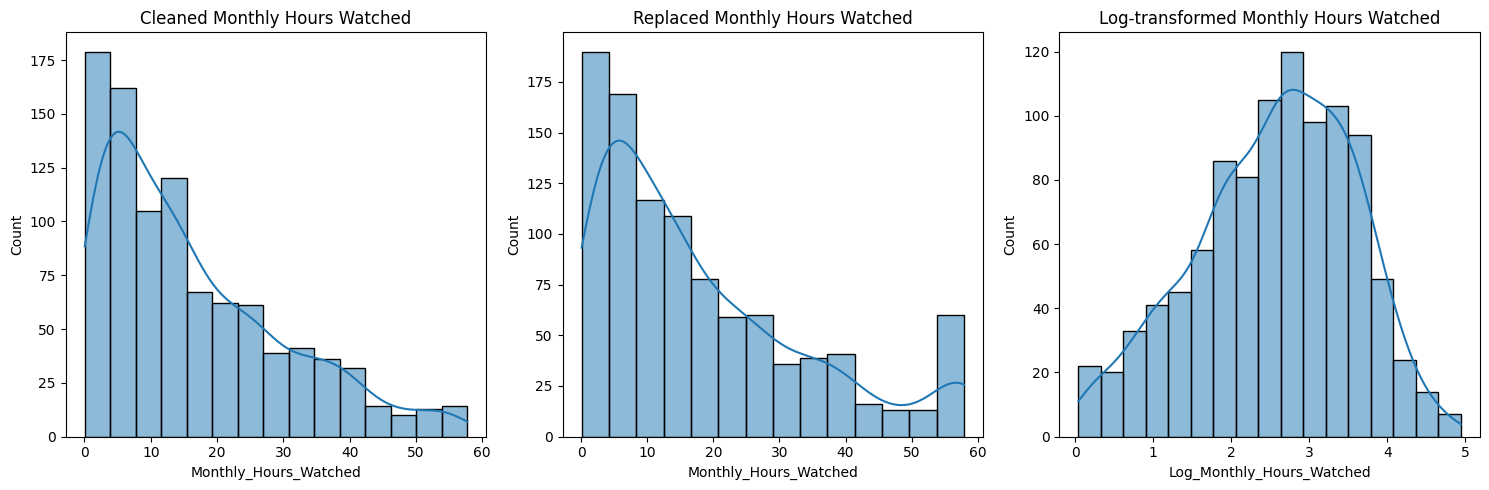

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
url = "https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv"
data = pd.read_csv(url)

# 检查初始数据
print(data.head())
print(data.describe())

# 方法 1: 移除异常值
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_cleaned = remove_outliers_iqr(data, 'Monthly_Hours_Watched')

# 方法 2: 替换异常值
def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

data_replaced = replace_outliers_iqr(data.copy(), 'Monthly_Hours_Watched')

# 方法 3: 数据变换
data['Log_Monthly_Hours_Watched'] = np.log1p(data['Monthly_Hours_Watched'])

# 方法 4: 仅在分析中处理
Q1 = data['Monthly_Hours_Watched'].quantile(0.25)
Q3 = data['Monthly_Hours_Watched'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_hours_watched = data['Monthly_Hours_Watched'][~((data['Monthly_Hours_Watched'] < lower_bound) | (data['Monthly_Hours_Watched'] > upper_bound))].mean()
print(f"Mean Monthly Hours Watched (excluding outliers): {mean_hours_watched}")

# 可视化
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data_cleaned['Monthly_Hours_Watched'], kde=True)
plt.title('Cleaned Monthly Hours Watched')

plt.subplot(1, 3, 2)
sns.histplot(data_replaced['Monthly_Hours_Watched'], kde=True)
plt.title('Replaced Monthly Hours Watched')

plt.subplot(1, 3, 3)
sns.histplot(data['Log_Monthly_Hours_Watched'], kde=True)
plt.title('Log-transformed Monthly Hours Watched')

plt.tight_layout()
plt.show()


In [32]:
# 计算总用户数和未流失用户数
subscription_retention = df.groupby('Subscription_Type').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
subscription_retention['retention_rate'] = (subscription_retention['retained_users'] / subscription_retention['total_users']) * 100

# 查看结果
print(subscription_retention)


                   total_users  retained_users  retention_rate
Subscription_Type                                             
Basic                      276             203       73.550725
Premium                    194             145       74.742268
Standard                   530             406       76.603774


In [33]:
# 计算总用户数和未流失用户数
gender_retention = df.groupby('Gender').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
gender_retention['retention_rate'] = (gender_retention['retained_users'] / gender_retention['total_users']) * 100

# 查看结果
print(gender_retention)


        total_users  retained_users  retention_rate
Gender                                             
Female          330             245       74.242424
Male            334             259       77.544910
Other           336             250       74.404762


In [34]:
# 计算总用户数和未流失用户数
gender_retention = df.groupby('Age').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
gender_retention['retention_rate'] = (gender_retention['retained_users'] / gender_retention['total_users']) * 100

# 查看结果
print(gender_retention)


     total_users  retained_users  retention_rate
Age                                             
18            24              17       70.833333
19            20              14       70.000000
20            20              16       80.000000
21            15              10       66.666667
22            23              19       82.608696
23            15              11       73.333333
24            13              10       76.923077
25            21              17       80.952381
26            17              11       64.705882
27            14               8       57.142857
28            16              12       75.000000
29            21              13       61.904762
30            16              13       81.250000
31            15              13       86.666667
32            15              13       86.666667
33            21              16       76.190476
34            20              14       70.000000
35            14               9       64.285714
36            18    

In [41]:
# 划分年龄区间
bins = [17, 30,40, 50,60, 70]
labels = ['18-29', '30-39','40-49','50-59','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# 查看结果
print(df[['Age', 'Age_Group']].head(10))


   Age Age_Group
0   56     50-59
1   69       60+
2   46     40-49
3   32     30-39
4   60     50-59
5   25     18-29
6   38     30-39
7   56     50-59
8   36     30-39
9   40     30-39


In [46]:
# 计算总用户数和未流失用户数
age_retention = df.groupby('Age_Group').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
age_retention['retention_rate'] = (age_retention['retained_users'] / age_retention['total_users']) * 100

# 查看结果
print(age_retention)


           total_users  retained_users  retention_rate
Age_Group                                             
18-29              235             171       72.765957
30-39              174             122       70.114943
40-49              214             171       79.906542
50-59              178             141       79.213483
60+                199             149       74.874372


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/1522607097.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_retention = df.groupby('Age_Group').agg(


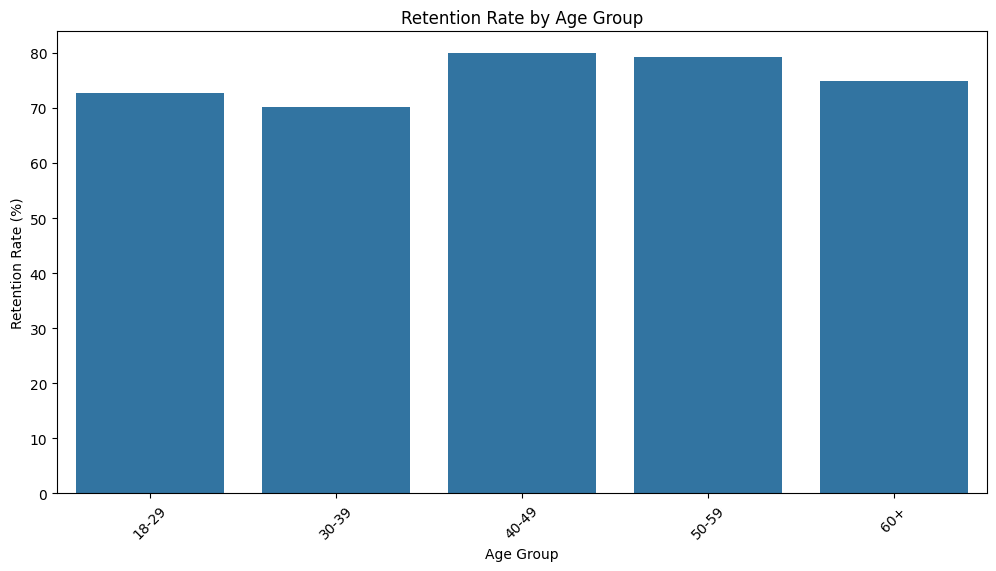

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化留存率
plt.figure(figsize=(12, 6))
sns.barplot(x=age_retention.index, y=age_retention['retention_rate'])
plt.title('Retention Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [48]:
# 计算每个年龄组和性别组合的总用户数和未流失用户数
age_gender_retention = df.groupby(['Age_Group', 'Gender']).agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
age_gender_retention['retention_rate'] = (age_gender_retention['retained_users'] / age_gender_retention['total_users']) * 100

# 重置索引以便于查看
age_gender_retention.reset_index(inplace=True)

# 查看结果
print(age_gender_retention)


   Age_Group  Gender  total_users  retained_users  retention_rate
0      18-29  Female           81              62       76.543210
1      18-29    Male           78              53       67.948718
2      18-29   Other           76              56       73.684211
3      30-39  Female           58              38       65.517241
4      30-39    Male           61              44       72.131148
5      30-39   Other           55              40       72.727273
6      40-49  Female           76              59       77.631579
7      40-49    Male           76              62       81.578947
8      40-49   Other           62              50       80.645161
9      50-59  Female           58              44       75.862069
10     50-59    Male           48              44       91.666667
11     50-59   Other           72              53       73.611111
12       60+  Female           57              42       73.684211
13       60+    Male           71              56       78.873239
14       6

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/3848752169.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_retention = df.groupby(['Age_Group', 'Gender']).agg(


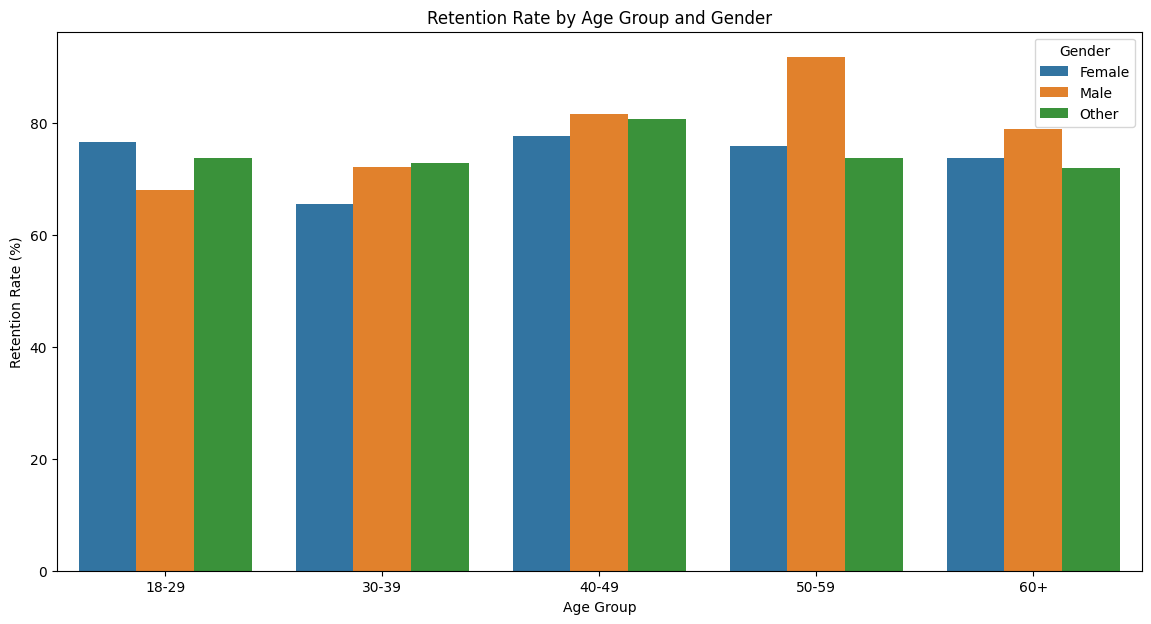

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化留存率
plt.figure(figsize=(14, 7))
sns.barplot(x='Age_Group', y='retention_rate', hue='Gender', data=age_gender_retention)
plt.title('Retention Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Retention Rate (%)')
plt.legend(title='Gender')
plt.show()


In [50]:
# 计算每个年龄组、性别和订阅类型组合的总用户数和未流失用户数
age_gender_subscription_retention = df.groupby(['Age_Group', 'Gender', 'Subscription_Type']).agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
age_gender_subscription_retention['retention_rate'] = (age_gender_subscription_retention['retained_users'] / age_gender_subscription_retention['total_users']) * 100

# 重置索引以便于查看
age_gender_subscription_retention.reset_index(inplace=True)

# 查看结果
print(age_gender_subscription_retention)


   Age_Group  Gender Subscription_Type  total_users  retained_users  \
0      18-29  Female             Basic           22              15   
1      18-29  Female           Premium           17              14   
2      18-29  Female          Standard           42              33   
3      18-29    Male             Basic           23              14   
4      18-29    Male           Premium           16              10   
5      18-29    Male          Standard           39              29   
6      18-29   Other             Basic           20              15   
7      18-29   Other           Premium           13              12   
8      18-29   Other          Standard           43              29   
9      30-39  Female             Basic           17              11   
10     30-39  Female           Premium           12               8   
11     30-39  Female          Standard           29              19   
12     30-39    Male             Basic           20              15   
13    

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/2698526910.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_subscription_retention = df.groupby(['Age_Group', 'Gender', 'Subscription_Type']).agg(


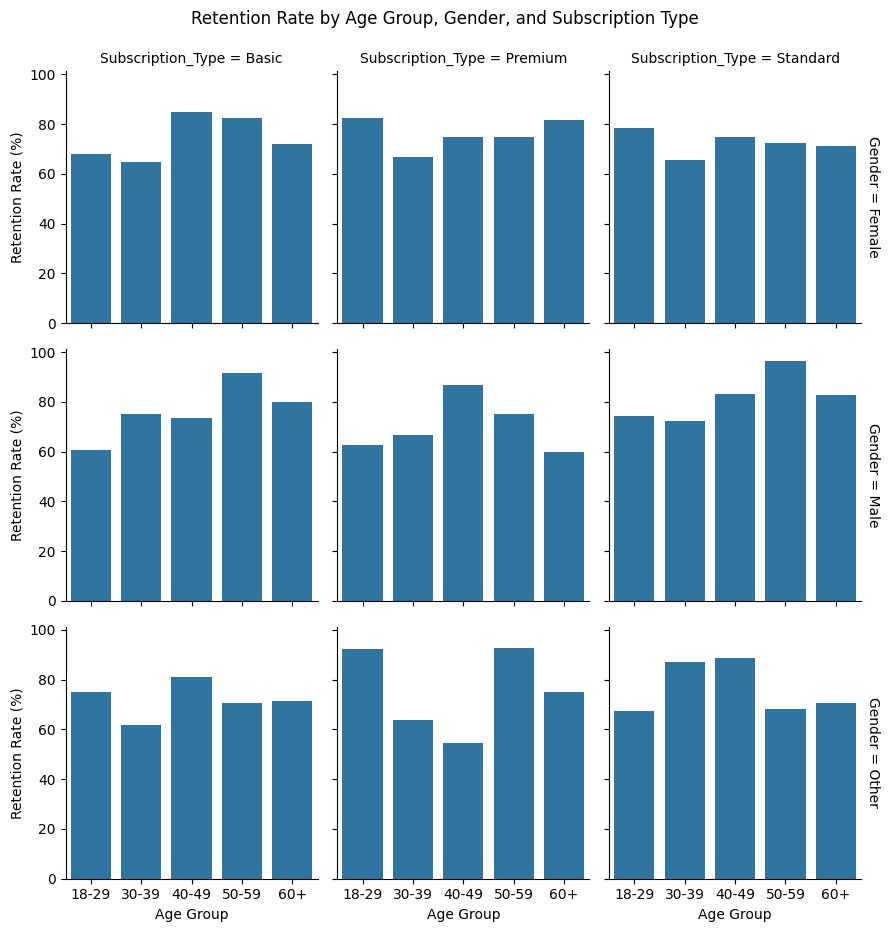

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用Seaborn的FacetGrid进行可视化
g = sns.FacetGrid(age_gender_subscription_retention, col="Subscription_Type", row="Gender", margin_titles=True)
g.map(sns.barplot, "Age_Group", "retention_rate", order=['18-29','30-39','40-49','50-59' ,'60+'])

# 调整标题和标签
g.fig.suptitle('Retention Rate by Age Group, Gender, and Subscription Type', y=1.03)
g.set_axis_labels("Age Group", "Retention Rate (%)")
plt.show()


In [59]:
# 计算每个地区的总用户数和未流失用户数
location_retention = df.groupby('Location').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
location_retention['retention_rate'] = (location_retention['retained_users'] / location_retention['total_users']) * 100

# 重置索引以便于查看
location_retention.reset_index(inplace=True)

# 查看结果
print(location_retention)


  Location  total_users  retained_users  retention_rate
0  Central          201             154       76.616915
1     East          200             140       70.000000
2    North          204             151       74.019608
3    South          179             137       76.536313
4     West          216             172       79.629630


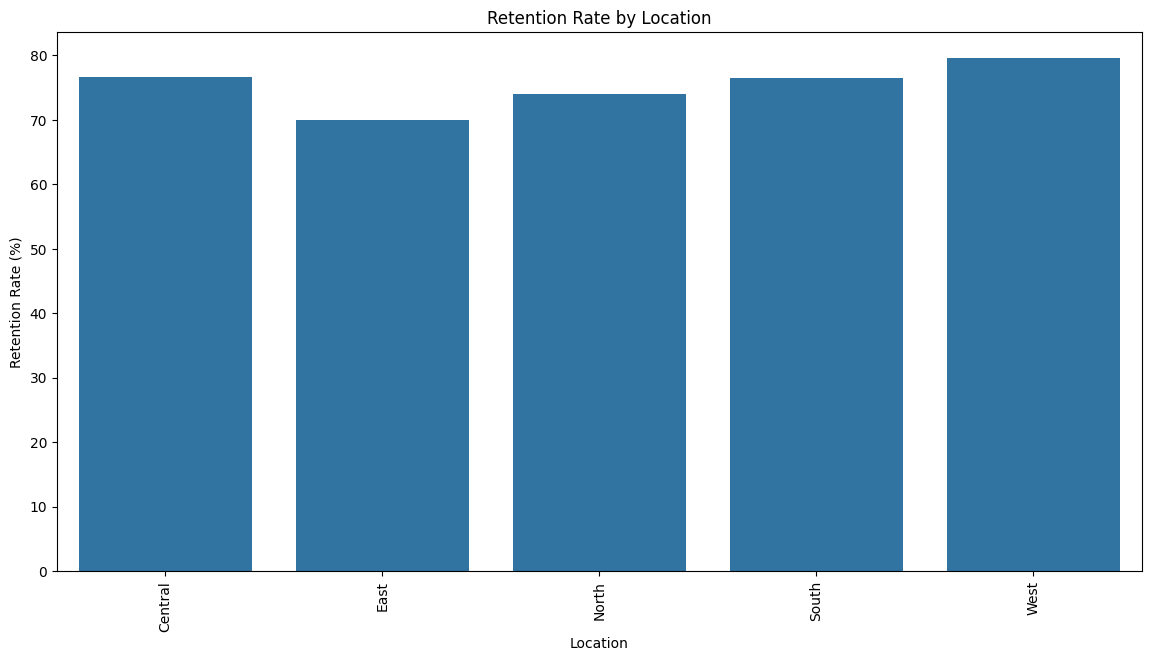

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化留存率
plt.figure(figsize=(14, 7))
sns.barplot(x='Location', y='retention_rate', data=location_retention)
plt.title('Retention Rate by Location')
plt.xlabel('Location')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=90)  # 旋转x轴标签以便于查看
plt.show()


In [62]:
# 筛选退订用户
churned_users = df[df['Churned'] == 1]

# 查看退订用户数据
print(churned_users.head())


    User_ID  Age Gender Location     Subscription_Start_Date  \
12       13   41  Other    North  2021-04-22 01:53:37.657108   
13       14   70  Other    South  2020-10-29 01:53:37.657119   
14       15   53  Other     East  2023-10-06 01:53:37.657130   
16       17   41  Other    South  2019-07-27 01:53:37.657151   
29       30   39   Male    North  2019-11-05 01:53:37.657296   

   Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
12          Standard            14.99   Direct Debit              14.011035   
13          Standard            14.99   Direct Debit              35.339461   
14          Standard            14.99    Credit Card              14.191293   
16           Premium            19.99    Credit Card              12.991876   
29          Standard            14.99    Credit Card              22.258651   

   Favorite_Genre Devices_Used  Average_Session_Length  Content_ID  \
12         Sci-Fi       Mobile                0.152133        1059   


In [63]:
# 按退订理由、订阅种类和评分分组并计算每组的用户数量
churn_analysis = churned_users.groupby(['Reason_for_Churn', 'Subscription_Type']).agg(
    average_rating=('Rating_Given', 'mean'),
    total_users=('User_ID', 'count')
).reset_index()

# 查看分析结果
print(churn_analysis)


             Reason_for_Churn Subscription_Type  average_rating  total_users
0   Dissatisfied with content             Basic        2.619048           21
1   Dissatisfied with content           Premium        2.875000            8
2   Dissatisfied with content          Standard        2.913043           23
3        Found better service             Basic        2.375000           16
4        Found better service           Premium        2.454545           11
5        Found better service          Standard        2.621622           37
6            Personal reasons             Basic        2.952381           21
7            Personal reasons           Premium        2.166667           12
8            Personal reasons          Standard        2.655172           29
9              Price increase             Basic        2.400000           15
10             Price increase           Premium        2.611111           18
11             Price increase          Standard        2.371429           35

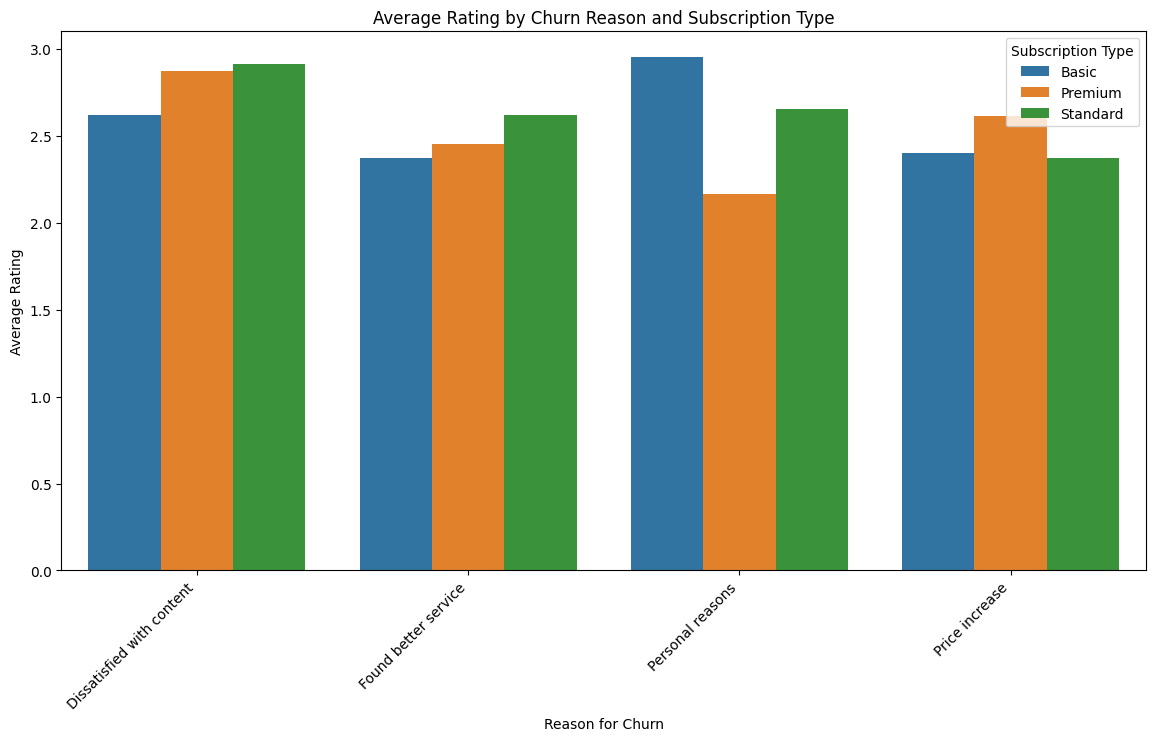

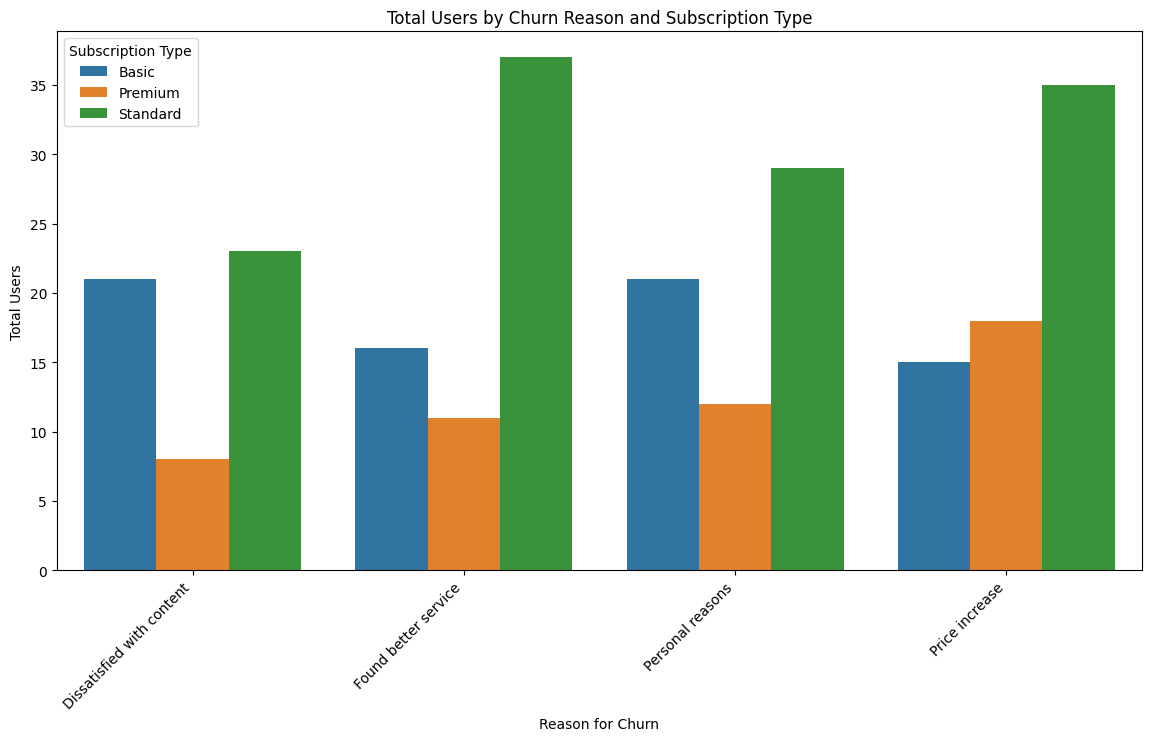

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化退订理由和评分的关系，按订阅种类分组
plt.figure(figsize=(14, 7))
sns.barplot(x='Reason_for_Churn', y='average_rating', hue='Subscription_Type', data=churn_analysis)
plt.title('Average Rating by Churn Reason and Subscription Type')
plt.xlabel('Reason for Churn')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.legend(title='Subscription Type')
plt.show()

# 可视化退订理由和用户数量的关系，按订阅种类分组
plt.figure(figsize=(14, 7))
sns.barplot(x='Reason_for_Churn', y='total_users', hue='Subscription_Type', data=churn_analysis)
plt.title('Total Users by Churn Reason and Subscription Type')
plt.xlabel('Reason for Churn')
plt.ylabel('Total Users')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.legend(title='Subscription Type')
plt.show()


In [65]:
# 计算每个评分的总用户数和未流失用户数
rating_retention = df.groupby('Rating_Given').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
rating_retention['retention_rate'] = (rating_retention['retained_users'] / rating_retention['total_users']) * 100

# 重置索引以便于查看
rating_retention.reset_index(inplace=True)

# 查看结果
print(rating_retention)


   Rating_Given  total_users  retained_users  retention_rate
0             1          191             133       69.633508
1             2          212             142       66.981132
2             3          184             127       69.021739
3             4          202             166       82.178218
4             5          211             186       88.151659


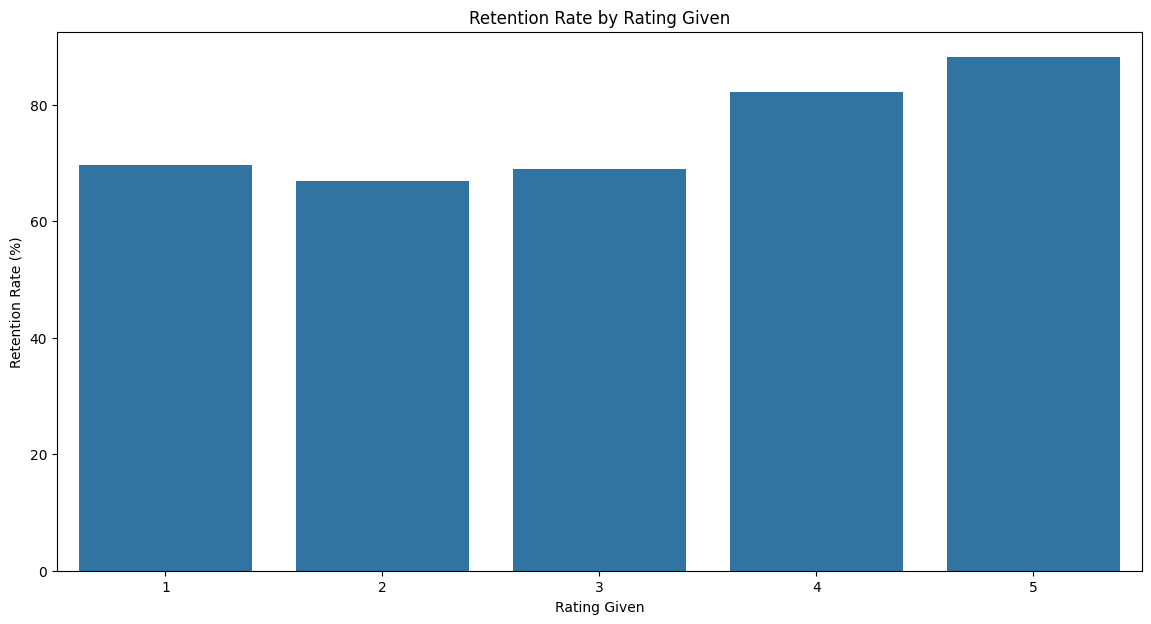

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化留存率
plt.figure(figsize=(14, 7))
sns.barplot(x='Rating_Given', y='retention_rate', data=rating_retention)
plt.title('Retention Rate by Rating Given')
plt.xlabel('Rating Given')
plt.ylabel('Retention Rate (%)')
plt.show()


In [73]:
# 筛选退订用户
churned_users = df[df['Churned'] == 1]

# 计算退订理由的分布
reason_distribution = churned_users['Reason_for_Churn'].value_counts().reset_index()
reason_distribution.columns = ['Reason_for_Churn', 'Count']

# 查看结果
print(reason_distribution)


            Reason_for_Churn  Count
0             Price increase     68
1       Found better service     64
2           Personal reasons     62
3  Dissatisfied with content     52


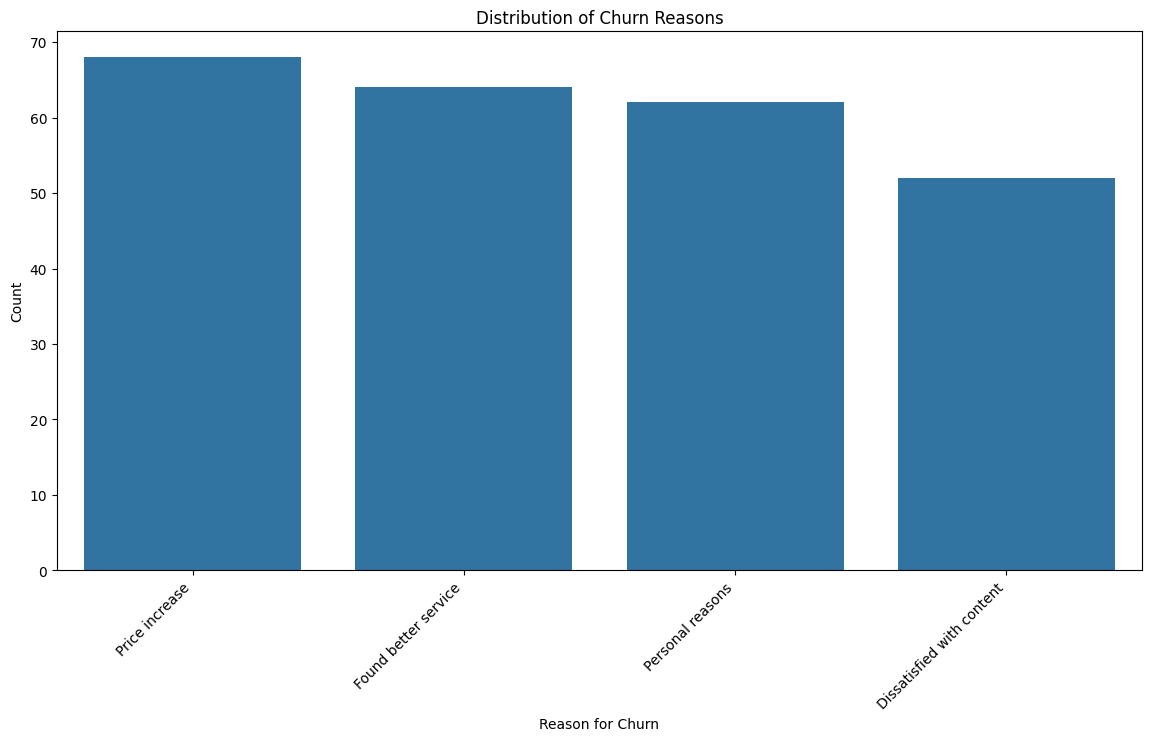

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化退订理由的分布
plt.figure(figsize=(14, 7))
sns.barplot(x='Reason_for_Churn', y='Count', data=reason_distribution)
plt.title('Distribution of Churn Reasons')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.show()


In [76]:
# 筛选退订用户
churned_users = df[df['Churned'] == 1]


In [77]:
# 计算每个订阅种类的退订理由分布
subscription_reason_distribution = churned_users.groupby(['Subscription_Type', 'Reason_for_Churn']).size().reset_index(name='Count')

# 查看结果
print(subscription_reason_distribution)


   Subscription_Type           Reason_for_Churn  Count
0              Basic  Dissatisfied with content     21
1              Basic       Found better service     16
2              Basic           Personal reasons     21
3              Basic             Price increase     15
4            Premium  Dissatisfied with content      8
5            Premium       Found better service     11
6            Premium           Personal reasons     12
7            Premium             Price increase     18
8           Standard  Dissatisfied with content     23
9           Standard       Found better service     37
10          Standard           Personal reasons     29
11          Standard             Price increase     35


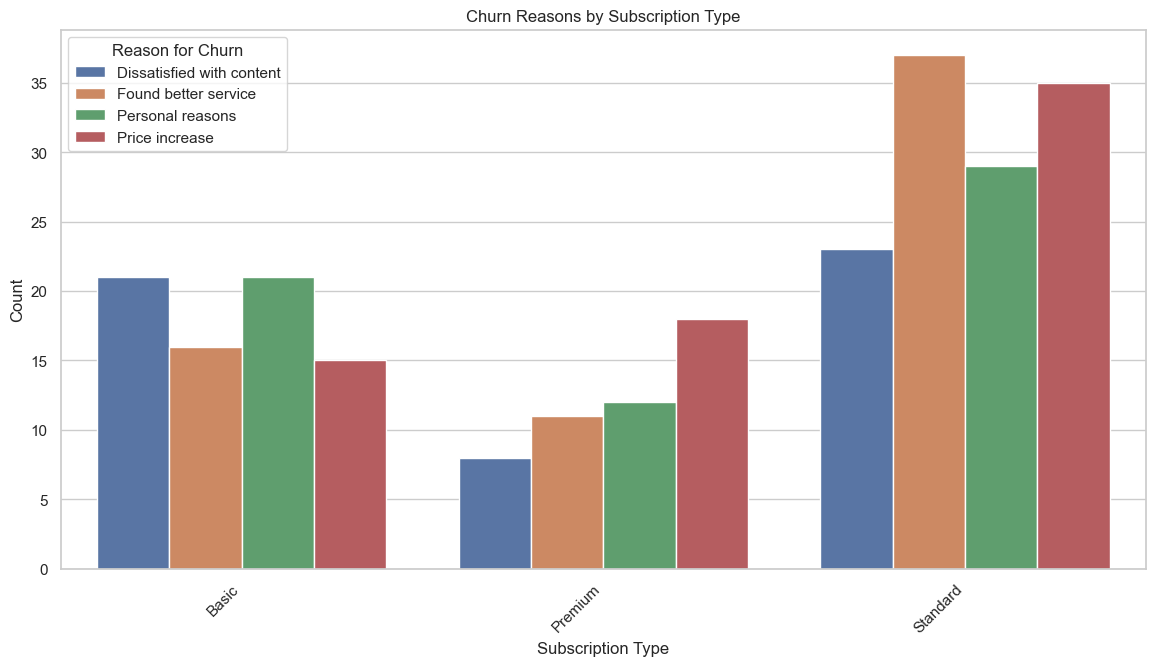

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 可视化每个订阅种类的退订理由分布
plt.figure(figsize=(14, 7))
sns.barplot(x='Subscription_Type', y='Count', hue='Reason_for_Churn', data=subscription_reason_distribution)
plt.title('Churn Reasons by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.legend(title='Reason for Churn')
plt.show()


In [80]:
# 计算每个订阅种类的退订理由分布
subscription_reason_distribution = churned_users.groupby(['Subscription_Type', 'Reason_for_Churn']).size().reset_index(name='Count')

# 将每种订阅类型单独存储
subscription_types = subscription_reason_distribution['Subscription_Type'].unique()

# 查看结果
print(subscription_reason_distribution)


   Subscription_Type           Reason_for_Churn  Count
0              Basic  Dissatisfied with content     21
1              Basic       Found better service     16
2              Basic           Personal reasons     21
3              Basic             Price increase     15
4            Premium  Dissatisfied with content      8
5            Premium       Found better service     11
6            Premium           Personal reasons     12
7            Premium             Price increase     18
8           Standard  Dissatisfied with content     23
9           Standard       Found better service     37
10          Standard           Personal reasons     29
11          Standard             Price increase     35


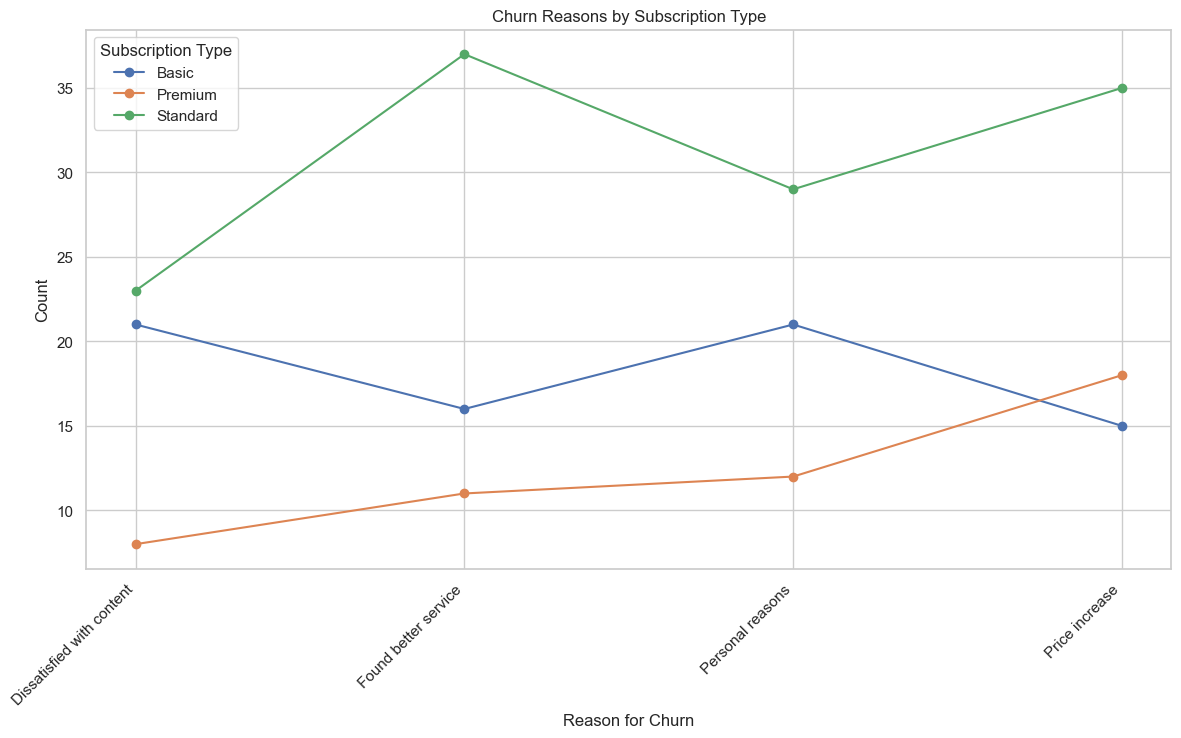

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个绘图
plt.figure(figsize=(14, 7))

# 为每个订阅种类绘制一条折线
for subscription_type in subscription_types:
    subset = subscription_reason_distribution[subscription_reason_distribution['Subscription_Type'] == subscription_type]
    plt.plot(subset['Reason_for_Churn'], subset['Count'], marker='o', label=subscription_type)

# 添加标题和标签
plt.title('Churn Reasons by Subscription Type')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.legend(title='Subscription Type')
plt.grid(True)

# 显示图形
plt.show()


In [83]:
# 计算每种设备的总用户数和未流失用户数
device_retention = df.groupby('Devices_Used').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
device_retention['retention_rate'] = (device_retention['retained_users'] / device_retention['total_users']) * 100

# 重置索引以便于查看
device_retention.reset_index(inplace=True)

# 查看结果
print(device_retention)


  Devices_Used  total_users  retained_users  retention_rate
0       Mobile          408             277       67.892157
1           PC          174             147       84.482759
2           TV          201             157       78.109453
3       Tablet          217             173       79.723502


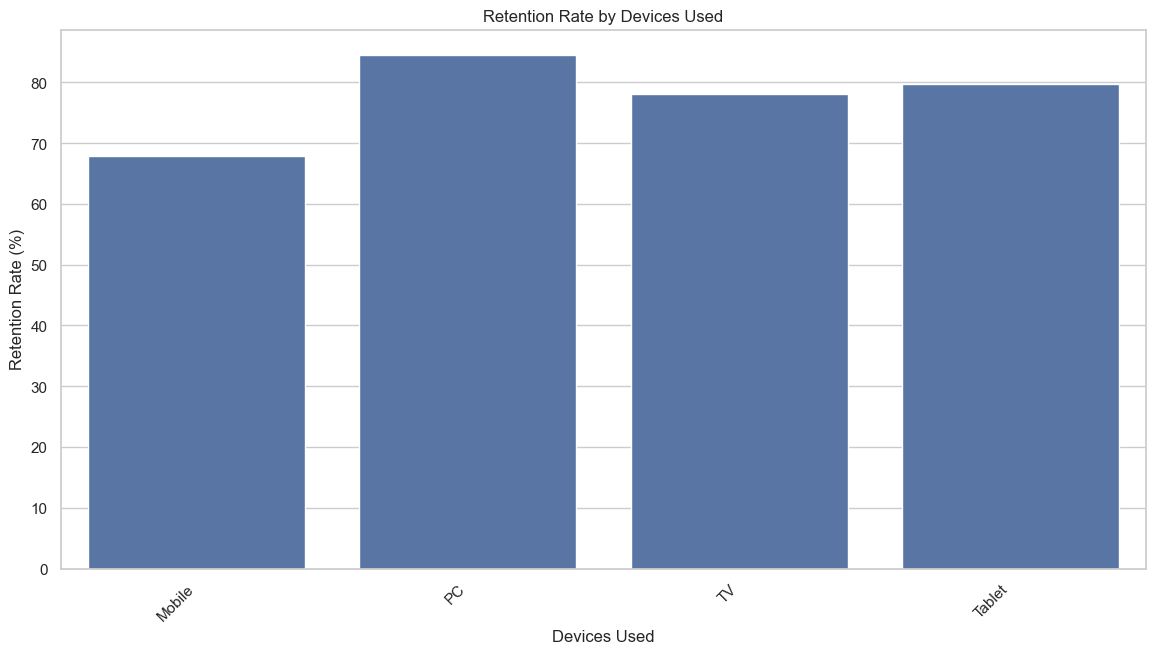

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化留存率
plt.figure(figsize=(14, 7))
sns.barplot(x='Devices_Used', y='retention_rate', data=device_retention)
plt.title('Retention Rate by Devices Used')
plt.xlabel('Devices Used')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.show()


In [90]:
# 计算每种设备的总用户数和未流失用户数
Genre_retention = df.groupby('Favorite_Genre').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
Genre_retention['retention_rate'] = (Genre_retention['retained_users'] / Genre_retention['total_users']) * 100

# 重置索引以便于查看
Genre_retention.reset_index(inplace=True)

# 查看结果
print(Genre_retention)

  Favorite_Genre  total_users  retained_users  retention_rate
0         Action          205             156       76.097561
1         Comedy          203             154       75.862069
2    Documentary          188             136       72.340426
3          Drama          212             165       77.830189
4         Sci-Fi          192             143       74.479167


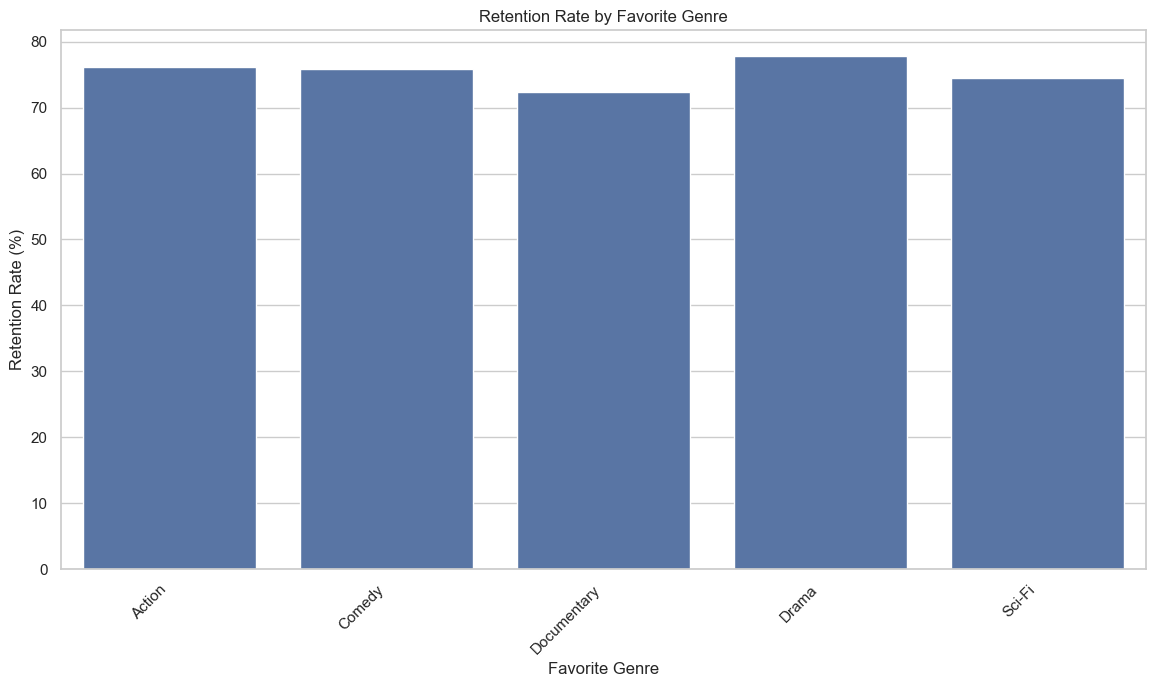

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化留存率
plt.figure(figsize=(14, 7))
sns.barplot(x='Favorite_Genre', y='retention_rate', data=genre_retention)
plt.title('Retention Rate by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.show()


In [93]:
# 筛选出取消订阅的用户
churned_users = df[df['Churned'] == 1]


In [94]:
# 计算每个观看种类的取消订阅用户数量
churned_genre_distribution = churned_users['Favorite_Genre'].value_counts().reset_index()
churned_genre_distribution.columns = ['Favorite_Genre', 'Churned_Count']

# 查看结果
print(churned_genre_distribution)


  Favorite_Genre  Churned_Count
0    Documentary             52
1         Sci-Fi             49
2         Comedy             49
3         Action             49
4          Drama             47


In [95]:
# 计算每种设备的用户数量
device_distribution = df['Devices_Used'].value_counts().reset_index()
device_distribution.columns = ['Devices_Used', 'Count']

# 查看结果
print(device_distribution)


  Devices_Used  Count
0       Mobile    408
1       Tablet    217
2           TV    201
3           PC    174


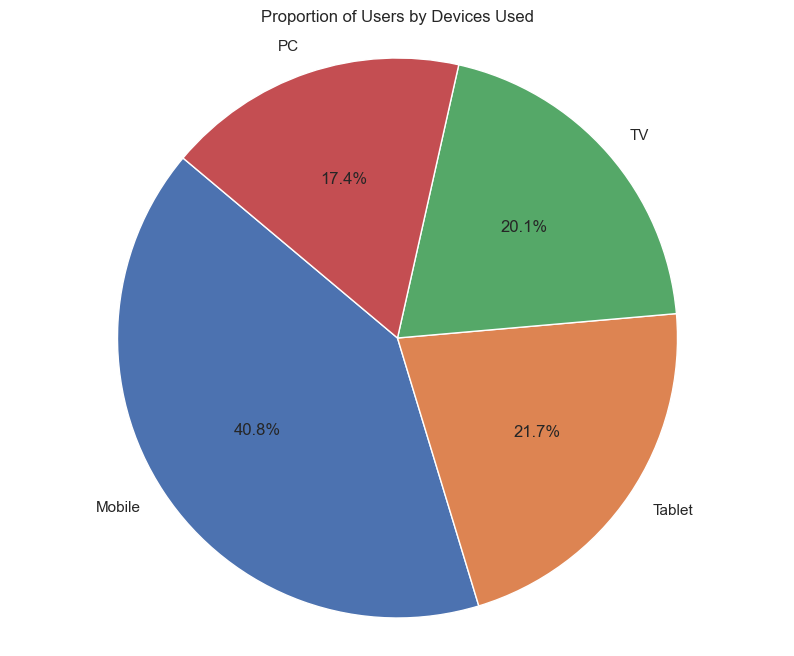

In [96]:
import matplotlib.pyplot as plt

# 可视化各个设备的用户比例
plt.figure(figsize=(10, 8))
plt.pie(device_distribution['Count'], labels=device_distribution['Devices_Used'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Users by Devices Used')
plt.axis('equal')  # 保持饼状图为圆形
plt.show()


In [98]:
# 筛选出取消订阅的用户
churned_users = df[df['Churned'] == 1]


In [99]:
# 计算每种设备的取消订阅用户数量
churned_device_distribution = churned_users['Devices_Used'].value_counts().reset_index()
churned_device_distribution.columns = ['Devices_Used', 'Count']

# 查看结果
print(churned_device_distribution)


  Devices_Used  Count
0       Mobile    131
1       Tablet     44
2           TV     44
3           PC     27


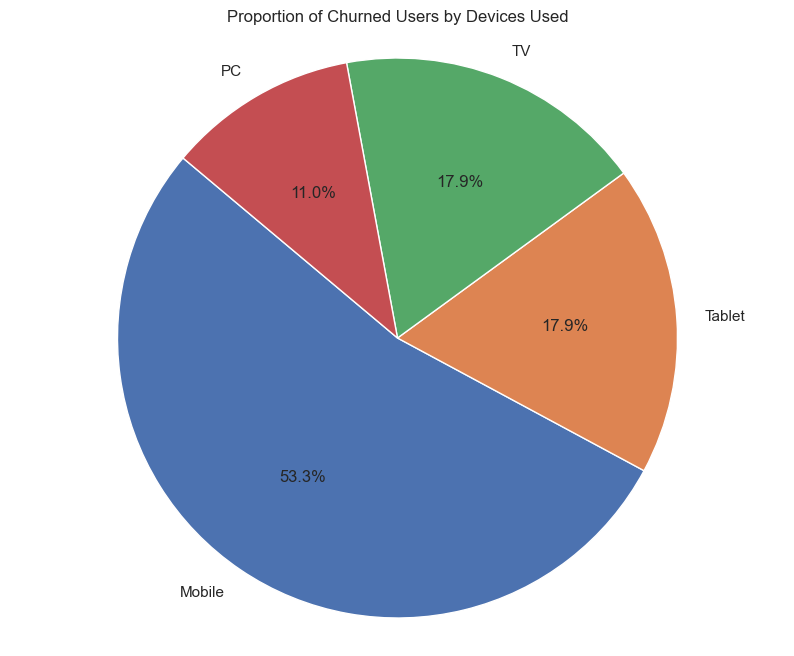

In [100]:
import matplotlib.pyplot as plt

# 可视化取消订阅用户中各个设备的用户比例
plt.figure(figsize=(10, 8))
plt.pie(churned_device_distribution['Count'], labels=churned_device_distribution['Devices_Used'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Churned Users by Devices Used')
plt.axis('equal')  # 保持饼状图为圆形
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Monthly Payment
sns.histplot(df['Monthly_Payment'], kde=True)
plt.title('Distribution of Monthly Payment')
plt.xlabel('Monthly Payment')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Churn rate by subscription type
sns.countplot(x='Subscription_Type', hue='Churned', data=df)
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()


In [102]:
# Calculate key metrics
total_revenue = df['Monthly_Payment'].sum() * len(df['Subscription_Start_Date'].unique())
average_monthly_payment = df['Monthly_Payment'].mean()
churn_rate = df['Churned'].mean() * 100
average_session_length = df['Average_Session_Length'].mean()
average_rating_given = df['Rating_Given'].mean()

# Display calculated metrics
print(f"Total Revenue: ${total_revenue}")
print(f"Average Monthly Payment: ${average_monthly_payment:.2f}")
print(f"Churn Rate: {churn_rate:.2f}%")
print(f"Average Session Length: {average_session_length:.2f} minutes")
print(f"Average Rating Given: {average_rating_given:.2f}")


Total Revenue: $14580000.000000002
Average Monthly Payment: $14.58
Churn Rate: 24.60%
Average Session Length: 1.89 minutes
Average Rating Given: 3.03


In [122]:
# 将日期列转换为日期时间格式
churned_users['Subscription_Start_Date'] = pd.to_datetime(churned_users['Subscription_Start_Date'], errors='coerce')
churned_users['Date_of_Churn'] = pd.to_datetime(churned_users['Date_of_Churn'], errors='coerce')

# 计算订阅时长
churned_users['Subscription_Duration'] = (churned_users['Date_of_Churn'] - churned_users['Subscription_Start_Date']).dt.days

# 查看结果
print(churned_users[['User_ID', 'Subscription_Start_Date', 'Date_of_Churn', 'Subscription_Duration']])


     User_ID    Subscription_Start_Date              Date_of_Churn  \
12        13 2021-04-22 01:53:37.657108 2021-06-13 01:53:37.657108   
13        14 2020-10-29 01:53:37.657119 2021-03-11 01:53:37.657119   
14        15 2023-10-06 01:53:37.657130 2024-07-02 01:53:37.657130   
16        17 2019-07-27 01:53:37.657151 2020-03-16 01:53:37.657151   
29        30 2019-11-05 01:53:37.657296 2020-08-13 01:53:37.657296   
..       ...                        ...                        ...   
983      984 2021-10-06 01:53:37.667748 2022-05-30 01:53:37.667748   
991      992 2019-10-04 01:53:37.667839 2019-11-09 01:53:37.667839   
992      993 2021-01-26 01:53:37.667850 2021-10-24 01:53:37.667850   
995      996 2020-10-26 01:53:37.667884 2021-03-14 01:53:37.667884   
998      999 2020-11-13 01:53:37.667917 2021-04-05 01:53:37.667917   

     Subscription_Duration  
12                      52  
13                     133  
14                     270  
16                     233  
29            

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/2494934844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_users['Subscription_Start_Date'] = pd.to_datetime(churned_users['Subscription_Start_Date'], errors='coerce')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/2494934844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_users['Date_of_Churn'] = pd.to_datetime(churned_users['Date_of_Churn'], errors='coerce')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000

In [110]:
churned_users.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Subscription_Duration
count,246.000000,246.000000,246,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246,246.000000
mean,505.361789,43.174797,2021-08-17 06:52:09.857642752,14.502195,17.039672,1.920114,1050.443089,2.593496,1.0,2022-02-28 15:27:17.174715904,195.357724
min,13.000000,18.000000,2019-05-13 01:53:37.658474,9.990000,0.041574,0.000821,1000.000000,1.000000,1.0,2019-08-11 01:53:37.658920,30.000000
25%,273.250000,30.000000,2020-04-22 07:53:37.663491072,9.990000,5.105890,0.641881,1022.250000,2.000000,1.0,2020-11-15 07:53:37.659917824,115.000000
50%,501.500000,41.000000,2021-05-01 01:53:37.660559104,14.990000,11.948593,1.277379,1050.000000,2.000000,1.0,2021-11-20 01:53:37.661230336,201.000000
75%,752.250000,56.000000,2022-11-26 19:53:37.664207360,14.990000,23.618435,2.704228,1077.750000,3.000000,1.0,2023-06-05 01:53:37.660055808,276.750000
max,999.000000,70.000000,2024-04-30 01:53:37.659297,19.990000,108.122364,11.417557,1099.000000,5.000000,1.0,2025-02-09 01:53:37.661719,364.000000
std,284.676765,15.507139,NaN,3.494289,17.236483,1.841691,30.536877,1.273513,0.0,NaN,95.483742


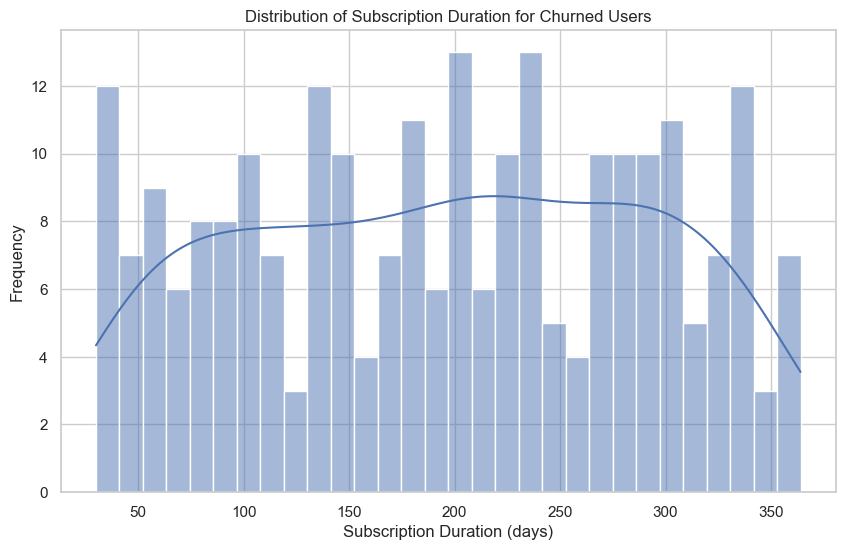

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化订阅时长的分布情况
plt.figure(figsize=(10, 6))
sns.histplot(churned_users['Subscription_Duration'].dropna(), kde=True, bins=30)
plt.title('Distribution of Subscription Duration for Churned Users')
plt.xlabel('Subscription Duration (days)')
plt.ylabel('Frequency')
plt.show()


In [108]:
# 将日期列转换为日期时间格式
churned_users['Subscription_Start_Date'] = pd.to_datetime(churned_users['Subscription_Start_Date'], errors='coerce')
churned_users['Date_of_Churn'] = pd.to_datetime(churned_users['Date_of_Churn'], errors='coerce')

# 计算订阅时长
churned_users['Subscription_Duration'] = (churned_users['Date_of_Churn'] - churned_users['Subscription_Start_Date']).dt.days

# 查看结果
print(churned_users[['User_ID', 'Subscription_Start_Date', 'Date_of_Churn', 'Subscription_Duration']])


     User_ID    Subscription_Start_Date              Date_of_Churn  \
12        13 2021-04-22 01:53:37.657108 2021-06-13 01:53:37.657108   
13        14 2020-10-29 01:53:37.657119 2021-03-11 01:53:37.657119   
14        15 2023-10-06 01:53:37.657130 2024-07-02 01:53:37.657130   
16        17 2019-07-27 01:53:37.657151 2020-03-16 01:53:37.657151   
29        30 2019-11-05 01:53:37.657296 2020-08-13 01:53:37.657296   
..       ...                        ...                        ...   
983      984 2021-10-06 01:53:37.667748 2022-05-30 01:53:37.667748   
991      992 2019-10-04 01:53:37.667839 2019-11-09 01:53:37.667839   
992      993 2021-01-26 01:53:37.667850 2021-10-24 01:53:37.667850   
995      996 2020-10-26 01:53:37.667884 2021-03-14 01:53:37.667884   
998      999 2020-11-13 01:53:37.667917 2021-04-05 01:53:37.667917   

     Subscription_Duration  
12                      52  
13                     133  
14                     270  
16                     233  
29            

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/2494934844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_users['Subscription_Start_Date'] = pd.to_datetime(churned_users['Subscription_Start_Date'], errors='coerce')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_1365/2494934844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_users['Date_of_Churn'] = pd.to_datetime(churned_users['Date_of_Churn'], errors='coerce')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000

In [109]:
# 获取最大订阅时长，确保是数值类型
max_duration = churned_users['Subscription_Duration'].dropna().max()

# 定义时间段，确保最大时间段上限不小于最大订阅时长
if pd.notnull(max_duration):
    bins = [0, 30, 90, 180, 365, 730, max_duration + 1]
else:
    bins = [0, 30, 90, 180, 365, 730, 1095]  # 假设最大为3年

labels = ['0-30 days', '31-90 days', '91-180 days', '181-365 days', '1-2 years', '2+ years']

# 按时间段分组
churned_users['Duration_Group'] = pd.cut(churned_users['Subscription_Duration'], bins=bins, labels=labels, right=False)

# 计算各时间段的用户数量和比例
duration_distribution = churned_users['Duration_Group'].value_counts(normalize=True).reset_index()
duration_distribution.columns = ['Duration_Group', 'Proportion']

# 查看结果
print(duration_distribution)


ValueError: bins must increase monotonically.